# Make a figure of a single pybasin model run

In [10]:
import pickle
import argparse
import os
import sys
import pdb

sys.path.append("..")
import lib.pybasin_figures as pf

## Location of model results file to show in figure

adjust this to point to your own model results file

these are

In [11]:
# file with model results data
model_file = ""

# directory to use if no model file is given
model_dir = "../model_output/example_dataset_1"

## Figure options

In [12]:
# figure type, choose "png", "pdf", "svg" or "jpg"
fig_type = "pdf"

# option to show provenance history or not
show_provenance_hist = True

## Show available files in output dir if no model_file is given

In [13]:
if model_file is None or model_file == "":
    
    model_files = os.listdir(model_dir)
    model_files = [f for f in model_files if f[-4:] == '.pck']

    model_files_path = [os.path.join(model_dir, mf) for mf in model_files]

    model_files_path.sort(key=os.path.getmtime)
    model_files_path = model_files_path[::-1]

    print('Model data files, sorted from newest to oldest:\n')

    for i, mf in enumerate(model_files_path):
        print(i, '\t', os.path.split(mf)[-1])

    print('enter the number of the file/model run you want to make a figure of:')

    mfi = int(input())

    model_file = model_files_path[mfi]

Model data files, sorted from newest to oldest:

0 	 model_data_NDW-01_18-10-2021_ms0.pck
enter the number of the file/model run you want to make a figure of:


 0


## Read model data file

In [14]:
print("reading model datafile {model_file}")

fin = open(model_file, 'rb')
model_run_data_fig = pickle.load(fin)
fin.close()

reading model datafile {model_file}


## Make figure and save as file

making a figure of the model results:
adding panel for VR data
adding panel for AFT data
gridding T or salinity data vs time
reducing number of strat units shown from 48 to 10
strat units shown in fig:
NUCT
NMVFS
NMRFV
CKHM
ATAL
RNMUU
RNROF
RBMDU
RBSHR
+DCDH
DCCU
[ 0. 50.]
[0.  0.5 1.  1.5]
[  0. 200. 400.]
saving figure as ../model_output/example_dataset_1/model_data_NDW-01_18-10-2021_ms0_figure.pdf
done


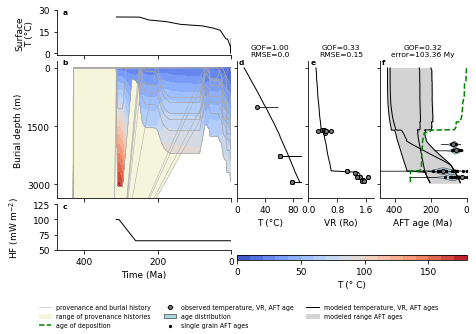

In [15]:
print("making a figure of the model results:")
fig = pf.model_vs_data_figure(model_run_data_fig, show_provenance_hist=show_provenance_hist)

fn_out = model_file[:-4] + f"_figure.{fig_type}"

print(f"saving figure as {fn_out}")
fig.savefig(fn_out, dpi=300)

print("done")